## Homework #5. Exploratory Data Analysis
#### Author: `Mostova Maria`
#### Total time spent on h/w (in minutes): `> 700`



In [1]:
import pandas as pd

DIALOGS_MERGED_DATA_PATH = "D:/pythonchik/progapy/proj/merged_data/dialogs_data_all.csv"
DIALOGS_META_MERGED_DATA_PATH = "D:/pythonchik/progapy/proj/merged_data/dialogs_users_all.csv"

df = pd.read_csv(DIALOGS_MERGED_DATA_PATH, low_memory=False)
df_meta = pd.read_csv(DIALOGS_META_MERGED_DATA_PATH, low_memory=False)


### Here I decided to check what is my most popular word. 


In [2]:
import re

my_id = '463034736'

my_df_copy = df.copy()
my_df_copy = my_df_copy[my_df_copy['from_id'] == 'PeerUser(user_id=' + str(my_id) + ')']
my_df = pd.DataFrame()

my_df['message'] = my_df_copy['message'].str.lower().str.split('\W+')

my_list = []
for index, row in my_df.iterrows():
    if isinstance(row['message'], list):
        my_list += row['message']
    else:
        my_list.append(row['message'])
my_list = [x for x in my_list if len(str(x)) > 3]

In [3]:
from collections import Counter

keys = Counter(my_list).keys()
values = Counter(my_list).values()
quantities = {'word': keys, 'value': values}
quan = pd.DataFrame(quantities)
quan.sort_values(by='value', ascending=False).head(10)

,word,value
16,очень,1991
577,хорошо,1986
417,меня,1817
32,просто,1429
657,тоже,1247
231,знаю,1205
584,надо,1197
8,тебе,1189
1112,блин,1095
522,хочу,1036


I had lots of problems doing that. Finally, I came up with the right solution - and here is a diagram of my most popular words that are longer than 4 symbols:

Text(0, 0.5, 'occurrence in my messages')

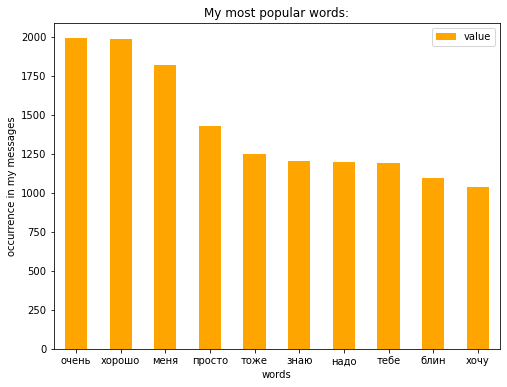

In [4]:
plt = quan.sort_values(by='value', ascending=False).head(10).plot.bar(
    x='word', rot=0, figsize=(8, 6), color='orange', title='My most popular words:')
plt.set_xlabel("words")
plt.set_ylabel("occurrence in my messages")

### And here is a word cloud!
I had to set most common prepositions as stopwords, since the diagram was more boring with it. Though, I still can't change its size :(

In [5]:
import sys
!{sys.executable} -m pip install wordcloud

In [6]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

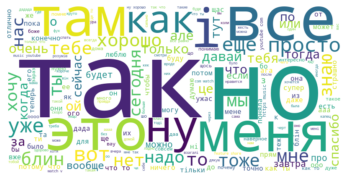

<Figure size 1440x720 with 0 Axes>

In [7]:
my_df_copy = df.copy()
my_df_copy = my_df_copy[my_df_copy['from_id'] == 'PeerUser(user_id=' + str(my_id) + ')']
list_of_messages = list(my_df_copy['message'])
list_of_messages = [str(x) for x in list_of_messages]

cleanedList = [x for x in list_of_messages if str(x) != 'nan']
text = " ".join(cleanedList).lower()

stop_words = frozenset(['да', 'и', 'в', 'на', 'у', 'а', 'я', 'с', 'не'])

wordcloud = WordCloud(width=800, height=400, stopwords = stop_words, background_color="white").generate(text)

import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.figure( figsize=(20,10) )

plt.show()

Then, I was curious about longer words, so here is a word cloud with words that are longer than 6 characters:

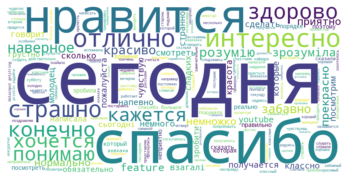

<Figure size 1440x720 with 0 Axes>

In [8]:
plt.clf()

import re

text = re.sub(r'\b\w{1,6}\b', '', text)
# text = " ".join(cleanedList).lower()

wordcloud2 = WordCloud(width=800, height=400, stopwords = stop_words, background_color="white").generate(text)

plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")

plt.figure( figsize=(20,10) )

plt.show()

## Tried sentiment analisys of my messages
I've read a lot of articles, looked through many ways to analyse text. Have choosen this way, since the biggest part of my messages is written in Russian and the inventors of this package made it for English and Russian both. And also it was way easier and more understandable to work with this package than any of other modules of this type.

In [9]:
import sys
!{sys.executable} -m pip install dostoevsky


After successfully downloading Dostoevsky library I had spent a lot of time dealing with problems. 

Below I was getting an error which said there is no file to load FastText from. 

As a solution, I downloaded this bin and placed it in needed package manually. Still, I don't understand why this happened🤷‍♀️

In [10]:
from dostoevsky.tokenization import RegexTokenizer
from dostoevsky.models import FastTextSocialNetworkModel

tokenizer = RegexTokenizer()
model = FastTextSocialNetworkModel(tokenizer=tokenizer)

#### Here are some of results of work. 

Unfortunately, I suppose this module works well with more formal text, not my everyday messages, since lots of results here don't give straight 1 in summary or show more negative result when the message itself is absolutely positive etc.

But I had fun doing it! Maybe I should use it on some articles and test it more🤔

#### Small refresher:

In results you can see 'speech' and 'skip'. 

'Speech' stands for casual phrases which don't have emotion coloring (as greetings, thanks etc).

'Skip' stands for messages which couldn't be recognized by neural network.

In [11]:
my_df_copy = df.copy()
my_df_copy = my_df_copy[my_df_copy['from_id'] == 'PeerUser(user_id=' + str(my_id) + ')']

list_of_messages = [str(x) for x in list_of_messages]

results = model.predict(list_of_messages, k=2)

for message, sentiment in zip(list_of_messages[3418:3425], results[3418:3425]):
    print(message, '-&gt;', sentiment)

ну, как-то я не попадаю -&gt; {'neutral': 0.9241518378257751, 'negative': 0.6723417043685913}
ааа -&gt; {'neutral': 0.7826725244522095, 'skip': 0.16452647745609283}
как она историю штанов показывала😭 -&gt; {'neutral': 0.6513648629188538, 'positive': 0.2568419873714447}
но здорово было -&gt; {'positive': 0.8670457601547241, 'skip': 0.03623005375266075}
но я боюсь на нее смотреть -&gt; {'neutral': 0.4532718360424042, 'skip': 0.1824355274438858}
но сегодня было класс!!! -&gt; {'positive': 0.9790457487106323, 'neutral': 0.038476187735795975}
она в глаза смотрит очень внимательно хахахахаххх -&gt; {'positive': 0.8991314172744751, 'skip': 0.022296184673905373}


In [12]:
df_with_results = pd.DataFrame(list(zip(list_of_messages, results)), columns=['message', 'result'])
# df_with_results['date'] = my_df_copy['date'][3410:3430]
df_with_results[3410:3430]


,message,result
3410,"да, очень","{'positive': 0.11597072333097458, 'neutral': 0..."
3411,не знаю...........,"{'neutral': 0.7310686111450195, 'negative': 0...."
3412,мотивировать...,"{'neutral': 0.9525841474533081, 'negative': 0...."
3413,надо как-то,"{'neutral': 1.0000100135803223, 'skip': 0.0100..."
3414,класс,"{'positive': 0.9755869507789612, 'neutral': 0...."
3415,это было очень здорово,"{'positive': 0.8933194279670715, 'negative': 0..."
3416,дада!!!!,"{'negative': 0.14415885508060455, 'positive': ..."
3417,но мне пока все нравится,"{'positive': 0.7663036584854126, 'neutral': 0...."
3418,"ну, как-то я не попадаю","{'neutral': 0.9241518378257751, 'negative': 0...."
3419,ааа,"{'neutral': 0.7826725244522095, 'skip': 0.1645..."


Here I made more detailed dataframe where each message has it's own positive, negative column etc.

In [13]:
sentiment_df = pd.DataFrame(columns=['message', 'positive', 'neutral', 'negative', 'skip', 'speech'])
sentiment_df = sentiment_df.append(results)
sentiment_df['message'] = list_of_messages
sentiment_df = sentiment_df.fillna(0.0)
sentiment_df[3410:3430]

,message,positive,neutral,negative,skip,speech
3410,"да, очень",0.115971,0.112805,0.000000,0.000000,0.000000
3411,не знаю...........,0.000000,0.731069,0.407343,0.000000,0.000000
3412,мотивировать...,0.000000,0.952584,0.061886,0.000000,0.000000
3413,надо как-то,0.000000,1.000010,0.000000,0.010024,0.000000
3414,класс,0.975587,0.098089,0.000000,0.000000,0.000000
3415,это было очень здорово,0.893319,0.000000,0.031154,0.000000,0.000000
3416,дада!!!!,0.100889,0.000000,0.144159,0.000000,0.000000
3417,но мне пока все нравится,0.766304,0.168867,0.000000,0.000000,0.000000
3418,"ну, как-то я не попадаю",0.000000,0.924152,0.672342,0.000000,0.000000
3419,ааа,0.000000,0.782673,0.000000,0.164526,0.000000


In [14]:
positive = sentiment_df['positive'].sum()
negative = sentiment_df['negative'].sum()
neutral = sentiment_df['neutral'].sum()
skip = sentiment_df['skip'].sum()
speech = sentiment_df['speech'].sum()
print('Positive:', positive)
print('Negative:', negative)
print('Neutral:', neutral)
print('Skip:', skip)
print('Speech:', speech)

Positive: 14234.266530990368
Negative: 6892.186797188755
Neutral: 53314.252496699715
Skip: 13200.03482664685
Speech: 1387.5812607161351


#### And this is a pie chart - semniment ratio of my messages.

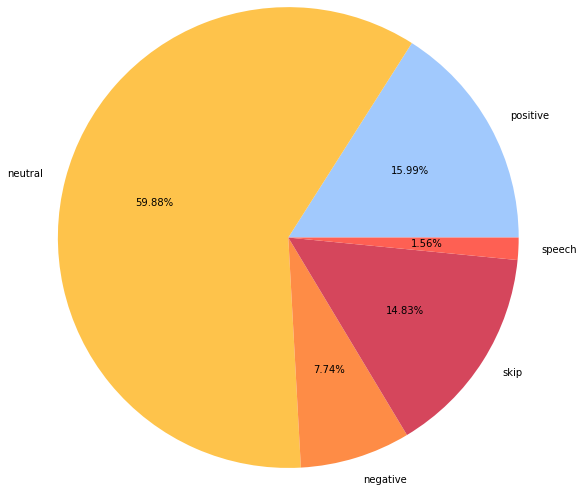

In [15]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['positive', 'neutral', 'negative', 'skip', 'speech']
values = [positive, neutral, negative, skip, speech]
ax.pie(values, labels = labels,autopct='%1.2f%%',radius=2, colors=['#a1c9fd','#fec34b','#fe8c46','#d5465c','#fe6053'])
plt.show()

### Tried to highlight specific areas on plot

Below I tried to show how the quantity of messages written to/from the person named Naum is getting lower on Fridays, since almost each Friday we spend together.

Unfortunately, I didn't come up with the right solution of highlighting Fridays and Saturdays, so here is just a plot of our messaging😥

In [16]:
naum_dialog_id = 428330492
naum = df.copy()
naum = naum[naum['dialog_id'] == naum_dialog_id]

In [17]:
naum = df.copy()
naum = naum[naum['dialog_id'] == naum_dialog_id]
min_date = '2021-12-01 00:00:00+00:00'
max_date = '2022-02-23 00:00:00+00:00'
naum = naum[(naum['date'] >= min_date) & (naum['date'] <= max_date)]
naum['date'] = pd.to_datetime(naum["date"]).dt.date

(Have spent a lot of time trying to give a number of weekday to any date - no result☹️)

In [18]:
s = pd.date_range('2016-12-31', '2017-01-08', freq='D').to_series()
s.dt.dayofweek
# weekdays = naum.copy()
# weekdays = weekdays['date']
# weekdays.head()

# week = {'date' : naum['date']}
# weekdays = pd.DataFrame(week)

# weekdays['date'] = pd.date_range('2021-12-01', '2022-02-23', freq='D').to_series()
# weekdays['day'] = weekdays['date'].dt.dayofweek
# weekdays.head(10)

# df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

d='2015-01-08 22:44:09' 
date=pd.to_datetime(d).date()

# monday = 0, sunday = 6

Text(0, 0.5, 'number of messages')

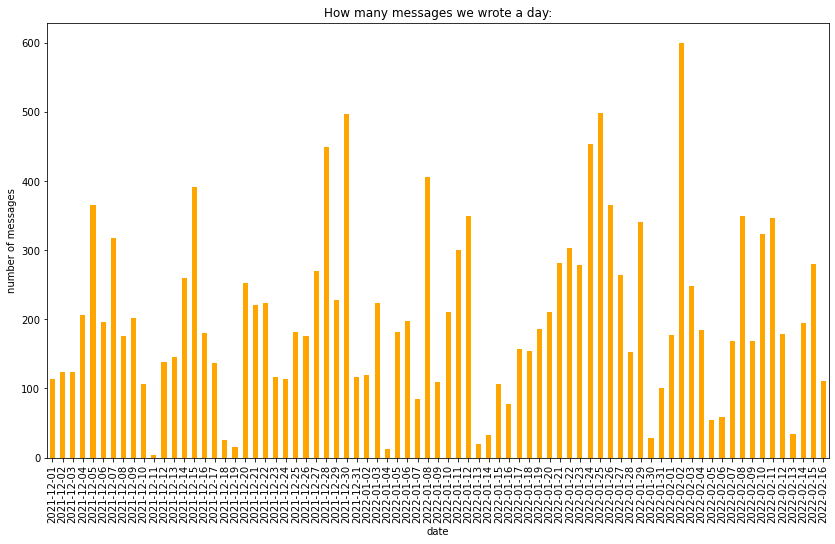

In [19]:
import matplotlib.pyplot as plt

ax = naum.groupby('date').size().plot.bar(color='orange', figsize=(14, 8), title='How many messages we wrote a day:')
ax.set_ylabel("number of messages")
# p = plt.axvspan('2021-12-21', '2021-12-25', facecolor='g', alpha=1,zorder=3)

## Also, tried merging datasets

I couldn't merge it using any of simple ways, so decided to do it using cycles.

Unfortunately, this method decided not to work, too. For 'df_copy' I still can't make a list of clear id's.

In [20]:
df_copy = df.copy()
df_meta_copy = df_meta.copy()

df_meta_copy['clear_id'] = ''
ind = 0
clear_list = []

for index, row in df_meta_copy.iterrows():
    needed_id = ''
    dig = False
    for i in str(row['users']):
        if i.isdigit():
            dig = True
            needed_id += str(i)
        if (not i.isdigit()) & dig == True:
            break
    clear_list.append(needed_id)
    ind += 1
    
df_meta_copy['clear_id'] = clear_list

In [21]:
df_copy['clear_id'] = ''
ind = 0
clear_list_for_big_df = []
for index, row in df_copy.head(30).iterrows():
    needed_str = str(row['from_id'])
    if needed_str != '':
        for i in clear_list:
            if needed_str.find(str(i)) != -1:
                clear_list_for_big_df.append(i)
    else:
        clear_list_for_big_df.append('')

In [23]:
merged_df = df.merge(df_meta, on = "dialog_id")
merged_df.head(10)

,id,date,from_id,to_id,fwd_from,message,type_x,duration,dialog_id,name,type_y,users
0,797,2022-02-16 07:31:18+00:00,NaN,PeerChannel(channel_id=1174214342),NaN,яблочко и овсянка с сыром и тахини,text,NaN,-1001174214342,маша в квадрате,Channel,"{'user_id': 463034736, 'first_name': 'маша', '..."
1,797,2022-02-16 07:31:18+00:00,NaN,PeerChannel(channel_id=1174214342),NaN,яблочко и овсянка с сыром и тахини,text,NaN,-1001174214342,маша в квадрате,Channel,"{'user_id': 497519466, 'first_name': 'братик🥺'..."
2,796,2022-02-15 18:40:12+00:00,NaN,PeerChannel(channel_id=1174214342),NaN,😭😭🤤🤤,text,NaN,-1001174214342,маша в квадрате,Channel,"{'user_id': 463034736, 'first_name': 'маша', '..."
3,796,2022-02-15 18:40:12+00:00,NaN,PeerChannel(channel_id=1174214342),NaN,😭😭🤤🤤,text,NaN,-1001174214342,маша в квадрате,Channel,"{'user_id': 497519466, 'first_name': 'братик🥺'..."
4,795,2022-02-15 18:39:24+00:00,NaN,PeerChannel(channel_id=1174214342),NaN,NaN,photo,NaN,-1001174214342,маша в квадрате,Channel,"{'user_id': 463034736, 'first_name': 'маша', '..."
5,795,2022-02-15 18:39:24+00:00,NaN,PeerChannel(channel_id=1174214342),NaN,NaN,photo,NaN,-1001174214342,маша в квадрате,Channel,"{'user_id': 497519466, 'first_name': 'братик🥺'..."
6,794,2022-02-15 17:22:32+00:00,NaN,PeerChannel(channel_id=1174214342),NaN,полтора эклера и сухари👊,text,NaN,-1001174214342,маша в квадрате,Channel,"{'user_id': 463034736, 'first_name': 'маша', '..."
7,794,2022-02-15 17:22:32+00:00,NaN,PeerChannel(channel_id=1174214342),NaN,полтора эклера и сухари👊,text,NaN,-1001174214342,маша в квадрате,Channel,"{'user_id': 497519466, 'first_name': 'братик🥺'..."
8,793,2022-02-15 13:24:59+00:00,NaN,PeerChannel(channel_id=1174214342),NaN,яблочко,text,NaN,-1001174214342,маша в квадрате,Channel,"{'user_id': 463034736, 'first_name': 'маша', '..."
9,793,2022-02-15 13:24:59+00:00,NaN,PeerChannel(channel_id=1174214342),NaN,яблочко,text,NaN,-1001174214342,маша в квадрате,Channel,"{'user_id': 497519466, 'first_name': 'братик🥺'..."


## This is the end!

Thank you!

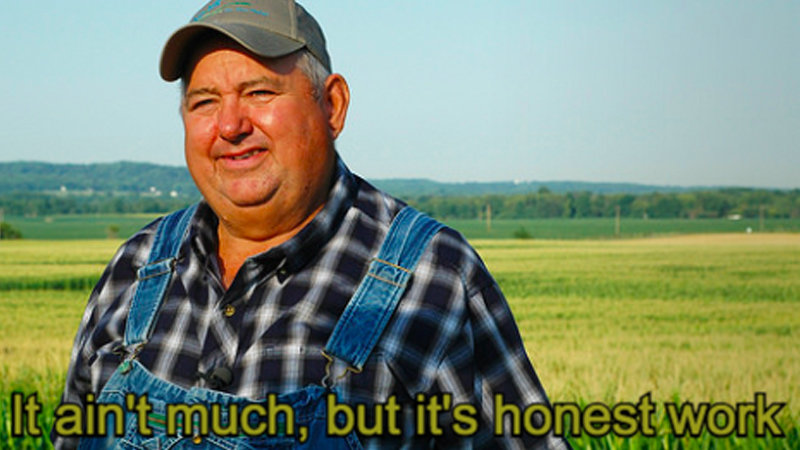